<a href="https://colab.research.google.com/github/Assan29/EV_HACKATHON/blob/main/Diamond_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Data Loading and Overview

In [2]:
df = pd.read_csv(r'/content/diamonds.csv')

In [3]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# Remove unknown column

In [8]:
df.drop(columns = 'Unnamed: 0',inplace = True)

In [10]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


#  Data Cleaning

In [6]:
# Check for missing values
print(df.isnull().sum())


Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


In [7]:
# Drop duplicates, if any
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(53940, 10)

# EDA Data Visualization

In [17]:
from numpy.core.numeric import zeros_like
x = df['cut'].value_counts().reset_index()
x.columns = ['cut', 'count']

y = df['color'].value_counts().reset_index()
y.columns = ['color', 'count']

z = df['clarity'].value_counts().reset_index()
z.columns = ['clarity', 'count']

fig = make_subplots(rows=1, cols=3, subplot_titles=['Cut', 'Color', 'Clarity'])

fig.add_trace(go.Bar(x=x['cut'], y=x['count'], name='Cut'), row=1, col=1)
fig.add_trace(go.Bar(x=y['color'], y=y['count'], name='Color'), row=1, col=2)
fig.add_trace(go.Bar(x=z['clarity'], y=z['count'], name='Clarity'), row=1, col=3)

fig.update_layout(title_text='Subplots of Bar Graphs: Cut, Color, and Clarity',
                  xaxis=dict(title='Categories'),
                  yaxis=dict(title='Count'),
                  showlegend=False)

fig.show()


In [28]:
histogram_fig = px.histogram(df, x='price', nbins=30,
                             title='Distribution of Price with KDE',
                             labels={'price': 'Price', 'count': 'Frequency'})
histogram_fig.show()

In [21]:
# Box plot of Cut vs Price using Plotly
box_fig = px.box(df, x='cut', y='price',
                 title='Box Plot of Price by Cut',
                 labels={'cut': 'Cut Quality', 'price': 'Price'})
box_fig.show()

In [18]:
#Scatter plot of Carat vs Price colored by Cut using Plotly
scatter_fig = px.scatter(df, x='carat', y='price', color='cut',
                         title='Carat vs Price Colored by Cut',
                         labels={'carat': 'Carat', 'price': 'Price', 'cut': 'Cut Quality'})
scatter_fig.show()

In [24]:
# 3D Scatter plot of Carat, Cut, and Price using Plotly
scatter_3d_fig = px.scatter_3d(df, x='carat', y='cut', z='price', color='cut',
                               title='3D Scatter Plot of Carat, Cut, and Price',
                               labels={'carat': 'Carat', 'cut': 'Cut Quality', 'price': 'Price'})
scatter_3d_fig.show()

In [25]:
# Select only numerical columns
numerical_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Create a subset of the dataset with numerical columns
numerical_data = df[numerical_columns]

# Calculate correlation matrix
corr_matrix = numerical_data.corr()

# Create a heatmap using Plotly with annotations
heatmap_fig = go.Figure(data=go.Heatmap(
                   z=corr_matrix.values,
                   x=corr_matrix.columns,
                   y=corr_matrix.columns,
                   colorscale='Viridis',
                   colorbar=dict(title="Correlation"),
                   zmin=-1, zmax=1))

heatmap_fig.update_layout(title="Correlation Heatmap (Numerical Features)",
                          xaxis=dict(title="Features"),
                          yaxis=dict(title="Features"))
heatmap_fig.show()


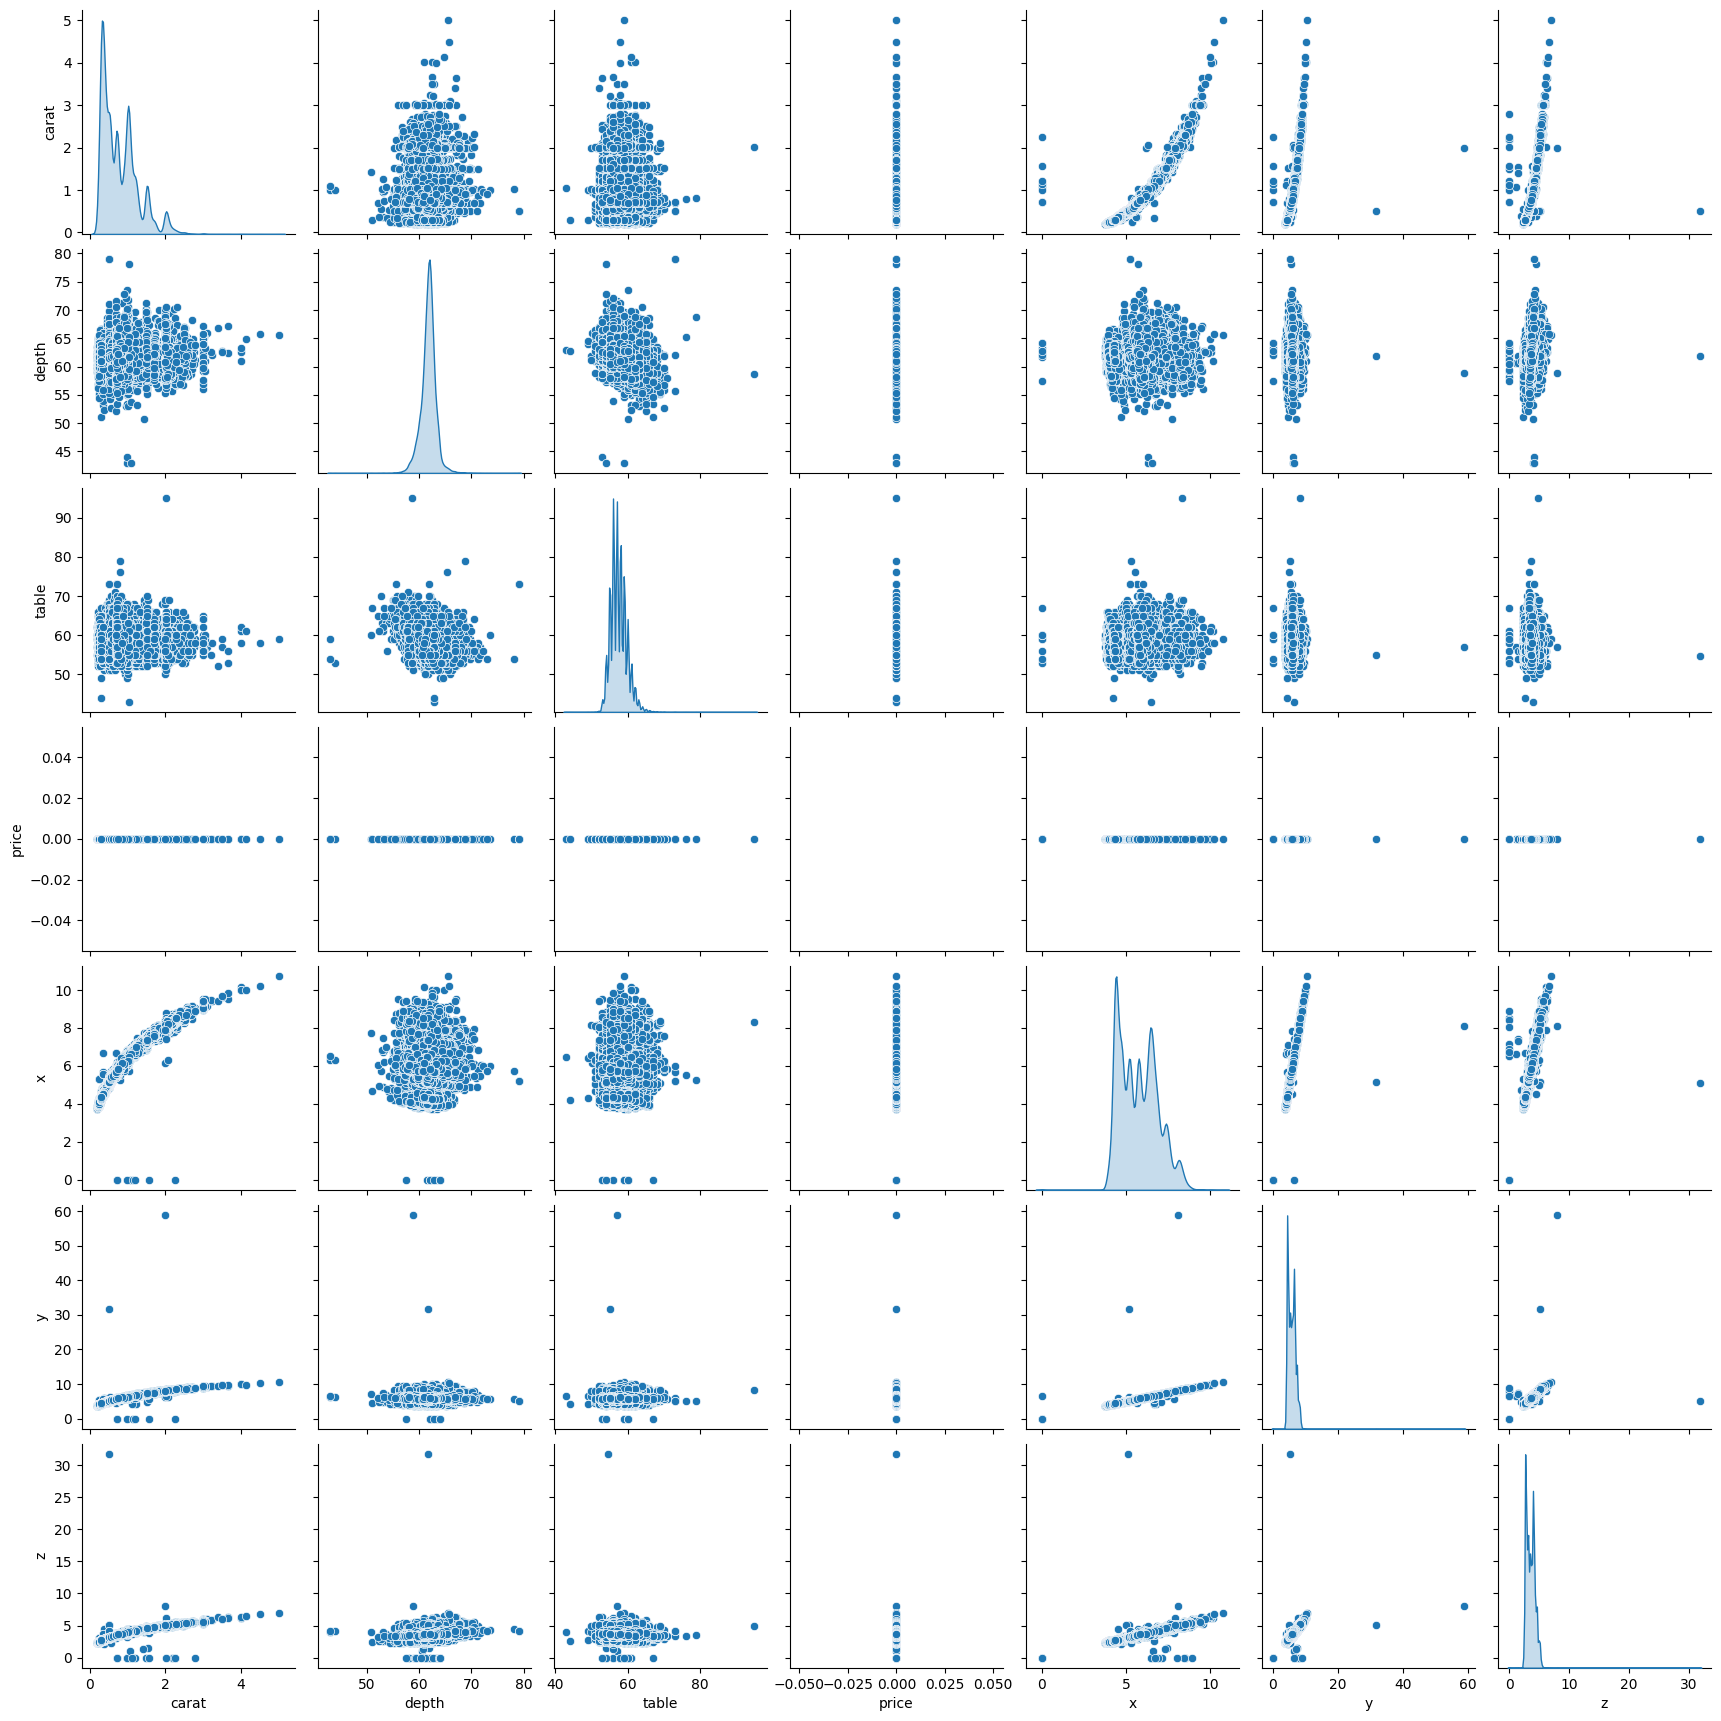

In [33]:


sns.pairplot(df, diag_kind='kde')
plt.show()